In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# ! kaggle datasets list

In [ ]:
# URL : https://towardsdatascience.com/downloading-kaggle-datasets-directly-into-google-colab-c8f0f407d73a

# ! kaggle datasets download -d hsankesara/flickr-image-dataset

In [ ]:
!kaggle datasets download -d hsankesara/flickr-image-dataset -p /content/sample_data/ --unzip

100% 8.15G/8.16G [02:06<00:00, 162MB/s]
100% 8.16G/8.16G [02:06<00:00, 69.1MB/s]


In [ ]:
!rm "/content/sample_data/flickr-image-dataset.zip"

print("Zip File deleted..")

rm: cannot remove '/content/sample_data/flickr-image-dataset.zip': No such file or directory
Zip File deleted..


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image

from keras.preprocessing.sequence import pad_sequences

In [ ]:
import os

os.listdir("/content/sample_data/flickr30k_images")

['results.csv', 'flickr30k_images']

In [ ]:
import numpy as np
import pandas as pd

url = "/content/sample_data/flickr30k_images/results.csv"

df = pd.read_csv(url, delimiter = "|")



# metadata = metadata.dropna()
# is_NaN = metadata.isnull()
# row_has_NaN = is_NaN.any(axis=1)
# rows_with_NaN = metadata[row_has_NaN]
# print(rows_with_NaN)

df.head()

,image_name,comment_number,comment
0,1000092795.jpg,0,Two young guys with shaggy hair look at their...
1,1000092795.jpg,1,"Two young , White males are outside near many..."
2,1000092795.jpg,2,Two men in green shirts are standing in a yard .
3,1000092795.jpg,3,A man in a blue shirt standing in a garden .
4,1000092795.jpg,4,Two friends enjoy time spent together .


In [ ]:
# identify the size of data frame
print("Size of the data frame is",df.size)

# identify the shape of the data frame 
print("Shape of the data frame is",df.shape)
print("No of Rows = ", df.shape[0])
print("No of Columns = ", df.shape[1])

df.describe()

Size of the data frame is 476745
Shape of the data frame is (158915, 3)
No of Rows =  158915
No of Columns =  3


,image_name,comment_number,comment
count,158915,158915,158914
unique,31783,6,158438
top,4875329519.jpg,1,Two dogs playing in the snow .
freq,5,31783,7


# ***Handling Missing Values***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158915 entries, 0 to 158914
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   image_name       158915 non-null  object
 1    comment_number  158915 non-null  object
 2    comment         158914 non-null  object
dtypes: object(3)
memory usage: 3.6+ MB


In [ ]:
miss_count = df.isnull().sum().sum()

print("No of missing values is",miss_count)

No of missing values is 1


In [ ]:
# Get rows where the data is missing
null_data = df[df.isnull().any(axis=1)]
null_data.head(5)

,image_name,comment_number,comment
19999,2199200615.jpg,4 A dog runs across the grass .,NaN


AxesSubplot(0.125,0.125;0.775x0.755)


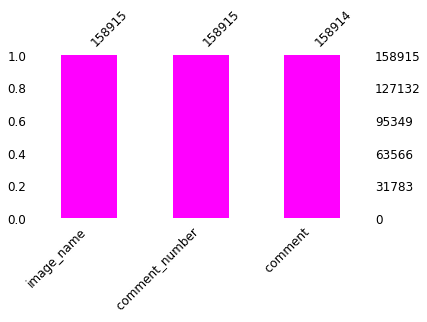

In [ ]:
import missingno as msno
# ! pip install missingno

missing_bar  = msno.bar(df, figsize=(6, 3), fontsize=12, color='magenta')

print(missing_bar)

In [ ]:
df = df.dropna()

miss_count = df.isnull().sum().sum()

print("No of missing values is",miss_count)

No of missing values is 0


# Exploartory data Analysis

# **Prepocessing**

 ### Tokenization

In [ ]:
from keras.preprocessing.text import Tokenizer

In [ ]:
text = df[" comment"][0]
print(text)

tokenizer = Tokenizer()

tokenizer.fit_on_texts(text)
t = tokenizer.texts_to_sequences(text)

print(tokenizer.word_index)

 Two young guys with shaggy hair look at their hands while hanging out in the yard .
{'h': 1, 't': 2, 'g': 3, 'i': 4, 'a': 5, 'o': 6, 'n': 7, 'y': 8, 'w': 9, 'u': 10, 's': 11, 'r': 12, 'e': 13, 'l': 14, 'd': 15, 'k': 16}


In [ ]:
def tokenize(text):
  tokenizer = Tokenizer()

  tokenizer.fit_on_texts(text)
  t = tokenizer.texts_to_sequences(text)

  return tokenizer, t

In [ ]:
texts = list([df[" comment"][0], df[" comment"][1]])
print(texts)

for text in texts:
  tokenizer, t = tokenize(text)
  print(tokenizer.word_index)

[' Two young guys with shaggy hair look at their hands while hanging out in the yard .', ' Two young , White males are outside near many bushes .']
{'h': 1, 't': 2, 'g': 3, 'i': 4, 'a': 5, 'o': 6, 'n': 7, 'y': 8, 'w': 9, 'u': 10, 's': 11, 'r': 12, 'e': 13, 'l': 14, 'd': 15, 'k': 16}
{'e': 1, 'a': 2, 's': 3, 't': 4, 'o': 5, 'u': 6, 'n': 7, 'w': 8, 'y': 9, 'h': 10, 'i': 11, 'm': 12, 'r': 13, 'g': 14, 'l': 15, 'd': 16, 'b': 17}


In [ ]:
def tokenize(x):
    """
    Tokenize x
    :param x: List of sentences/strings to be tokenized
    :return: Tuple of (tokenized x data, tokenizer used to tokenize x)
    """
    tokenizer=Tokenizer()
    tokenizer.fit_on_texts(x)
    t=tokenizer.texts_to_sequences(x)
    # TODO: Implement
    return t, tokenizer

# Tokenize Example output
text_sentences = [
    'The quick brown fox jumps over the lazy dog .',
    'By Jove , my quick study of lexicography won a prize .',
    'This is a short sentence .']
text_tokenized, text_tokenizer = tokenize(text_sentences)
print(text_tokenizer.word_index)
print()
for sample_i, (sent, token_sent) in enumerate(zip(text_sentences, text_tokenized)):
    print('Sequence {} in x'.format(sample_i + 1))
    print('  Input:  {}'.format(sent))
    print('  Output: {}'.format(token_sent))

{'the': 1, 'quick': 2, 'a': 3, 'brown': 4, 'fox': 5, 'jumps': 6, 'over': 7, 'lazy': 8, 'dog': 9, 'by': 10, 'jove': 11, 'my': 12, 'study': 13, 'of': 14, 'lexicography': 15, 'won': 16, 'prize': 17, 'this': 18, 'is': 19, 'short': 20, 'sentence': 21}

Sequence 1 in x
  Input:  The quick brown fox jumps over the lazy dog .
  Output: [1, 2, 4, 5, 6, 7, 1, 8, 9]
Sequence 2 in x
  Input:  By Jove , my quick study of lexicography won a prize .
  Output: [10, 11, 12, 2, 13, 14, 15, 16, 3, 17]
Sequence 3 in x
  Input:  This is a short sentence .
  Output: [18, 19, 3, 20, 21]


In [ ]:
def pad(x, length=None):
  """
  Pad x
  :param x: List of sequences.
  :param length: Length to pad the sequence to.  If None, use length of longest sequence in x.
  :return: Padded numpy array of sequences
  """
  # TODO: Implement
  padding=pad_sequences(x,padding='post',maxlen=length)
  return padding

# Pad Tokenized output
test_pad = pad(text_tokenized)

for sample_i, (token_sent, pad_sent) in enumerate(zip(text_tokenized, test_pad)):
  print('Sequence {} in x'.format(sample_i + 1))
  print('  Input:  {}'.format(np.array(token_sent)))
  print('  Output: {}'.format(pad_sent))

Sequence 1 in x
  Input:  [1 2 4 5 6 7 1 8 9]
  Output: [1 2 4 5 6 7 1 8 9 0]
Sequence 2 in x
  Input:  [10 11 12  2 13 14 15 16  3 17]
  Output: [10 11 12  2 13 14 15 16  3 17]
Sequence 3 in x
  Input:  [18 19  3 20 21]
  Output: [18 19  3 20 21  0  0  0  0  0]


Read the data

In [ ]:
def load_image(name):
  
  img = image.load_img(name,target_size=(32,32,3))
  img = image.img_to_array(img)
  #img = img/255
  #plt.imshow(img)
  img = np.reshape(img,(32*32*3))
  return img

In [ ]:
image_arr = []
sentence_arr = []

for ind in range(5000):

  if ind % 5 != 0:
      continue

  image_location = (df.iloc[ind,:]['image_name'])
  sentence = (df.iloc[ind,:][' comment'])
  
  
  image_arr.append(load_image("/content/sample_data/flickr30k_images/flickr30k_images/"+ str(image_location)) )
  sentence_arr.append('<SOS>'+sentence+'<EOS>')
  
        
Images =  np.array(image_arr)

In [ ]:
def preprocess(sentences):
  text_tokenized, text_tokenizer = tokenize(sentences)
  text_pad = pad(text_tokenized)
  return text_pad, text_tokenizer

Sentence , token_Sentence = preprocess(sentence_arr)
Sentence

array([[  2,  17,  21, ...,   0,   0,   0],
       [  2, 105,  37, ...,   0,   0,   0],
       [  2,   1,  49, ...,   0,   0,   0],
       ...,
       [  2,   1, 296, ...,   0,   0,   0],
       [  2,   1,  21, ...,   0,   0,   0],
       [  2,   1,  15, ...,   0,   0,   0]], dtype=int32)

In [ ]:
token_Sentence

In [ ]:
import pickle

#save it
with open(f'token_Sentence.pickle', 'wb') as file:
    pickle.dump(token_Sentence, file) 

In [ ]:
import numpy as np

def create_batch(src, tar , batchsize , i):

  src, tar =  np.transpose(src[(i-1)*batchsize : (i-1)*batchsize + batchsize]) , np.transpose(tar[(i-1)*batchsize : (i-1)*batchsize + batchsize])

  return torch.tensor(src).long(),torch.tensor(tar).long()

# PyTorch Implementation

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
class Transformer(nn.Module):
  def __init__(
    self,
    embedding_size,
    src_vocab_size,
    trg_vocab_size,
    src_pad_idx,
    num_heads,
    num_encoder_layers,
    num_decoder_layers,
    forward_expansion,
    dropout,
    max_len_s,
    max_len_t,
    device,
):
    super(Transformer, self).__init__()
    self.src_word_embedding = nn.Embedding(src_vocab_size, embedding_size)
    self.src_position_embedding = nn.Embedding(max_len_s, embedding_size)
    self.trg_word_embedding = nn.Embedding(trg_vocab_size, embedding_size)
    self.trg_position_embedding = nn.Embedding(max_len_t, embedding_size)

    self.device = device
    self.transformer = nn.Transformer(
        embedding_size,
        num_heads,
        num_encoder_layers,
        num_decoder_layers,
        forward_expansion,
        dropout,
    )
    self.fc_out = nn.Linear(embedding_size, trg_vocab_size)
    self.dropout = nn.Dropout(dropout)
    self.src_pad_idx = src_pad_idx

  def make_src_mask(self, src):
    src_mask = src.transpose(0, 1) == self.src_pad_idx

    # (N, src_len)
    return src_mask.to(self.device)

  def forward(self, src, trg):
    src_seq_length, N = src.shape
    trg_seq_length, N = trg.shape

    src_positions = (
        torch.arange(0, src_seq_length)
        .unsqueeze(1)
        .expand(src_seq_length, N)
        .to(self.device)
    )

    trg_positions = (
        torch.arange(0, trg_seq_length)
        .unsqueeze(1)
        .expand(trg_seq_length, N)
        .to(self.device)
    )

    embed_src = self.dropout(
        (self.src_word_embedding(src) + self.src_position_embedding(src_positions))
    )
    embed_trg = self.dropout(
        (self.trg_word_embedding(trg) + self.trg_position_embedding(trg_positions))
    )

    src_padding_mask = self.make_src_mask(src)
    trg_mask = self.transformer.generate_square_subsequent_mask(trg_seq_length).to(self.device)
    out = self.transformer(
        embed_src,
        embed_trg,
        src_key_padding_mask=src_padding_mask,
        tgt_mask=trg_mask,
    )
    out = self.fc_out(out)
    return out

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [ ]:
# Model hyperparameters
src_vocab_size = 256
trg_vocab_size = len(token_Sentence.word_index)
embedding_size = 512
num_heads = 8
num_encoder_layers = 3
num_decoder_layers = 3
dropout = 0.10
max_len_s = Images.shape[1]
max_len_t = len(Sentence[0])
forward_expansion = 4
src_pad_idx = 0

In [ ]:
# Training hyperparameters
num_epochs = 10000
learning_rate = 3e-4
batch_size = 1

In [ ]:
model = Transformer(
    embedding_size,
    src_vocab_size,
    trg_vocab_size,
    src_pad_idx,
    num_heads,
    num_encoder_layers,
    num_decoder_layers,
    forward_expansion,
    dropout,
    max_len_s,
    max_len_t,
    device,
).to(device)

optimizer = optim.Adam(model.parameters(), lr=learning_rate)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, factor=0.1, patience=10, verbose=True
)

pad_idx = 0
criterion = nn.CrossEntropyLoss(ignore_index=pad_idx).cuda()

In [ ]:
import time

def train():
  model.train() # Turn on the train mode
  total_loss = 0
  start_time = time.time()
  for i in range(1, 999):
    src,tar = create_batch(Images,Sentence, batch_size , i)
    src = src.to(device)
    tar = tar.to(device)
    optimizer.zero_grad()
    output = model(src,tar)
    loss = criterion(output.view(-1, output.shape[2]), tar.reshape(-1))
    loss.backward()
    torch.nn.utils.clip_grad_norm_(model.parameters(), 0.5)
    optimizer.step()
    cur_loss = loss.item()
    total_loss += cur_loss
    log_interval = 100
    if i % log_interval == 0 and i > 0:
        elapsed = time.time() - start_time
        print('| epoch {:3d} | {:5d}/{:5d} batches | '
              's/batch {:5.2f} | '
              'loss {:5.2f} | ppl {:8.2f}'.format(
                epoch, i, (src.shape[1]) // batch_size, 
                elapsed  / log_interval,
                cur_loss, math.exp(cur_loss)))
        start_time = time.time()
  return total_loss

In [ ]:
import math

for epoch in range(1):
  epoch_start_time = time.time()
  loss = train()
  print('-' * 89)
  print('| end of epoch {:3d} | time: {:5.2f}s | Training loss {:5.2f} | '
        .format(epoch, (time.time() - epoch_start_time),
                                    loss))

KeyboardInterrupt: ignored

In [ ]:
import pickle

#save it
with open(f'test_cpu.pickle', 'wb') as file:
    pickle.dump(model, file) 


In [ ]:
# #load it
# with open(f'test.pickle', 'rb') as file2:
#     s1_new = pickle.load(file2)

# #check it
# s1_new.get_grade()

In [ ]:
def display_image(name):
  img = image.load_img(name,target_size=(512,512,3))
  img = image.img_to_array(img)
  img = img/255
  plt.imshow(img)

In [ ]:
def evaluate(index):
  image_location, sent = df.iloc[index,0], df.iloc[index,2]
  image_arr = []
  img = load_image('/content/sample_data/flickr30k_images/flickr30k_images/'+str(image_location))
  image_arr.append(img)
  img_arr = np.array(image_arr)
  sentence = []
  sentence.append(sent)
  sentence[0] = '<SOS> '+sentence[0]+'<EOS>'
  sentence = pad(token_Sentence.texts_to_sequences(sentence) , length = max_len_t)
  src , tar = create_batch(img_arr,sentence, 1,1)
  src = src.to(device)
  tar = tar.to(device)
  model.eval()
  output =  model(src,tar)
  loss = criterion(output.view(-1, output.shape[2]), tar.reshape(-1))
  sentence_formed = ''
  val, ind = torch.max(output.view(-1, output.shape[2]), 1)
  for word in ind:
      #print('--->'+sentence_formed+'    '+str(word.item()))
      if word.item() == 3: # EOS
              break
      for key, value in token_Sentence.word_index.items():
          #print(value == word.item())
          if value == word.item() and value != 2: # sos
              sentence_formed = sentence_formed + key +' '
              break
  display_image('/content/sample_data/flickr30k_images/flickr30k_images/'+str(image_location))
  return sentence_formed , loss

In [ ]:
evaluate(0)

In [ ]:
evaluate(10)